In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal


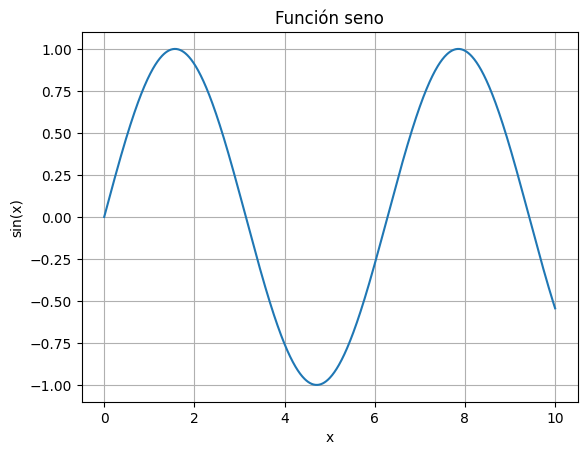

In [4]:
# Crear datos
x = np.linspace(0, 10, 1000)
y = np.sin(x)

# Graficar
plt.plot(x, y)
plt.title("Función seno")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.grid()
plt.show()


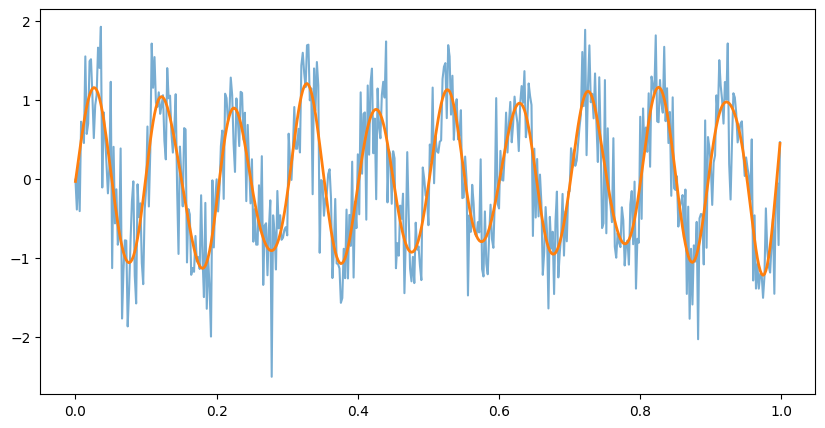

In [4]:
# Señal original con ruido
fs = 500  # Hz
t = np.linspace(0, 1, fs, endpoint=False)
signal_original = np.sin(2*np.pi*10*t) + 0.5*np.random.randn(len(t))

# Crear filtro pasa-bajas de 20 Hz
b, a = signal.butter(4, 20, 'low', fs=fs)

# Aplicar filtro
signal_filtrada = signal.filtfilt(b, a, signal_original)

# Graficar
plt.figure(figsize=(10,5))

plt.plot(t, signal_original, label="Original", alpha=0.6)
plt.plot(t, signal_filtrada, label="Filtrada", linewidth=2)
